In [3]:
#import required libraries.
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

# Project Goals.

Project goals will summarize the specific goals of this project. From the dataset, we hope to answer specific questions regarding the conservation stauts of different animals. we would like to know what category of animals are more likely to be endangered and if there is such a relation. The data set contains dataset of species and their conservation status. Another one contains the sightings of the animal from 4 different national parks. 

Questions that we hope to answer from the data set are:
1. how many times were a certain specied observed.
2. where was it observed.
3. is there a relation between the species and the category it falls into.

## Loading and explaning the observation dataset

In [4]:
observations = pd.read_csv("observations.csv")
species = pd.read_csv("species_info.csv")

In [5]:
observations.head(10)


,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85
5,Elymus virginicus var. virginicus,Yosemite National Park,112
6,Spizella pusilla,Yellowstone National Park,228
7,Elymus multisetus,Great Smoky Mountains National Park,39
8,Lysimachia quadrifolia,Yosemite National Park,168
9,Diphyscium cumberlandianum,Yellowstone National Park,250


In [107]:
print("total number of animals: ", observations.shape[0])
print("national parks: ", observations.park_name.unique())
#total number of observations from each park. 
total_obs = observations.groupby('park_name')['observations'].sum()
print(total_obs)

total number of animals:  23296
national parks:  ['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']
park_name
Bryce National Park                     576025
Great Smoky Mountains National Park     431820
Yellowstone National Park              1443562
Yosemite National Park                  863332
Name: observations, dtype: int64


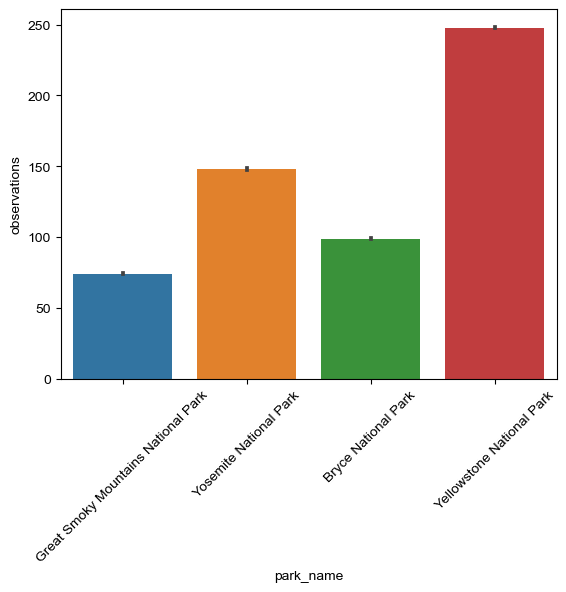

In [9]:
#visualizing the observations from the dataset
sns.barplot(
    data = observations,
    x = observations['park_name'],
    y = observations['observations'],
    
)
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
sns.set(font_scale = 2.0)
plt.show()

## Loading and understanding the species dataset.

In [11]:
species = pd.read_csv("species_info.csv")

In [12]:
species.head(10)

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN
5,Mammal,Odocoileus virginianus,White-Tailed Deer,NaN
6,Mammal,Sus scrofa,"Feral Hog, Wild Pig",NaN
7,Mammal,Canis latrans,Coyote,Species of Concern
8,Mammal,Canis lupus,Gray Wolf,Endangered
9,Mammal,Canis rufus,Red Wolf,Endangered


In [13]:
print("the total animal species in the data set are: ", species.shape[0])

the total animal species in the data set are:  5824


In [14]:
print("there are 4 conservation status of animals namely: ", species.conservation_status.unique())

there are 4 conservation status of animals namely:  [nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


In [15]:
##the category by which the species are listed in the data set.
category = species.groupby("category").size()
print(category)
category_list = category.tolist()
categories = ['Amphibian','Bird','Fish','Mammal','Nonvascular Plant','Reptile','Vascular Plant']

category
Amphibian              80
Bird                  521
Fish                  127
Mammal                214
Nonvascular Plant     333
Reptile                79
Vascular Plant       4470
dtype: int64
<class 'list'>
<class 'list'>


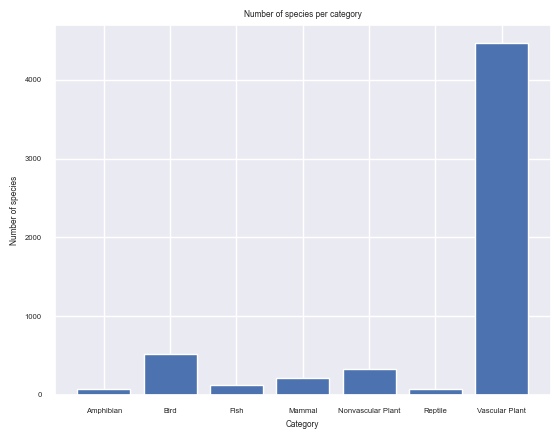

In [108]:
fig, ax = plt.subplots()

# Set the x-axis labels and the data for the bars
labels = category.index
data = category.values

# Create the bar chart
ax.bar(labels, data)

# Set the axis labels and title
ax.set_xlabel('Category')
ax.set_ylabel('Number of species')
ax.set_title('Number of species per category')

# Display the chart
plt.show()

In [25]:
conservation_status = species.groupby("conservation_status").size()
print(conservation_status)

conservation_status
Endangered             16
In Recovery             4
Species of Concern    161
Threatened             10
dtype: int64


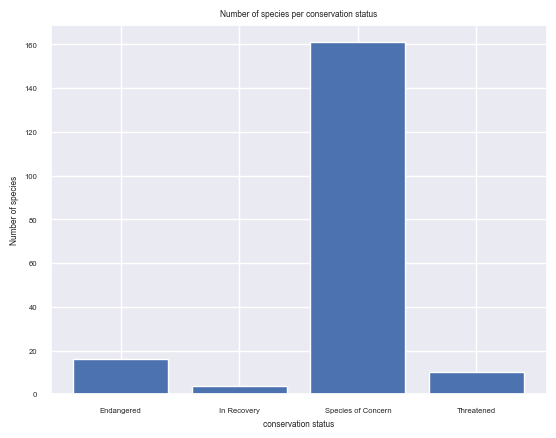

In [110]:
fig, ax = plt.subplots()
#set the x axis labels and data
labels = conservation_status.index
values = conservation_status.values
#bar chart
ax.bar(labels, values)
ax.set_xlabel("conservation status")
ax.set_ylabel("Number of species")
ax.set_title("Number of species per conservation status")
#show the plot
plt.show()

### We can see that most of the animals fall under the species of conern category. similarly, the biggest category are vascular plants.  
The definition of each conservation status is below:

- `Species of Concern`: declining or appear to be in need of conservation
- `Threatened`: vulnerable to endangerment in the near future
- `Endangered`: seriously at risk of extinction
- `In Recovery`: formerly `Endangered`, but currently neither in danger of extinction throughout all or a significant portion of its range

## Data cleaning and Analysis.
1. we want to clean the data and remove all the unnecessary values or typos from it.
2. we want to combine both of the datasets into one dataframe.
3. next, we want to see how many time were ceratain species observed. if the number of observations can help us understand their current status of each species. 

In [111]:
species.head(5)

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Information
1,Mammal,Bos bison,"American Bison, Bison",No Information
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Information
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Information
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Information


In [112]:
species.fillna('No Information', inplace=True)
species.head(5)

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Information
1,Mammal,Bos bison,"American Bison, Bison",No Information
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Information
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Information
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Information


In [44]:
species.groupby('conservation_status').size()

conservation_status
Endangered              16
In Recovery              4
No Information        5633
Species of Concern     161
Threatened              10
dtype: int64

It is safe to remove the values that do not contain information about conservation status for one data set. we want to see which animals fall in our endangered category.

In [113]:
species_updated = species[species['conservation_status'] != 'No Information']
species_updated.head(10)

,category,scientific_name,common_names,conservation_status
7,Mammal,Canis latrans,Coyote,Species of Concern
8,Mammal,Canis lupus,Gray Wolf,Endangered
9,Mammal,Canis rufus,Red Wolf,Endangered
29,Mammal,Eptesicus fuscus,Big Brown Bat,Species of Concern
30,Mammal,Lasionycteris noctivagans,Silver-Haired Bat,Species of Concern
33,Mammal,Myotis austroriparius,"Mississippi Myotis, Southeastern Myotis",Species of Concern
34,Mammal,Myotis grisescens,Gray Myotis,Endangered
35,Mammal,Myotis keenii,Keen's Myotis,Species of Concern
36,Mammal,Myotis leibii,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern
37,Mammal,Myotis lucifugus,"Little Brown Bat, Little Brown Myotis",Species of Concern


In [114]:
species_updated.shape[0]
##this has helped us clean the data to remove rows without conservation_status information. Next, we can go ahead 
##merge two different data sets to get necessary insights regarding the animals and their status. 

191

In [48]:
observations.head(10)

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85
5,Elymus virginicus var. virginicus,Yosemite National Park,112
6,Spizella pusilla,Yellowstone National Park,228
7,Elymus multisetus,Great Smoky Mountains National Park,39
8,Lysimachia quadrifolia,Yosemite National Park,168
9,Diphyscium cumberlandianum,Yellowstone National Park,250


In [115]:
sorted_observations = observations.sort_values("observations")

In [119]:
sorted_observations.head(5)


,scientific_name,park_name,observations
9418,Corydalis aurea,Bryce National Park,9
15511,Collomia tinctoria,Great Smoky Mountains National Park,10
16054,Strix occidentalis,Great Smoky Mountains National Park,11
18823,Rana sierrae,Great Smoky Mountains National Park,11
20375,Sambucus mexicana,Great Smoky Mountains National Park,12


In [120]:
sorted_observations.shape[0]

23296

In [50]:
combined = pd.merge( updated_species_df, observations, how = "left", on ="scientific_name")

In [129]:
print('Corydalis aurea' in species['scientific_name'])
print('Corydalis aurea' in combined['scientific_name'])

False
False


A lot of species that are in the observations data set are not in the species data set. So, we need to choose the ones that are common in both the data sets. The `combined` data set contains the combined information of the species and their observations.

In [121]:
combined.head(5)


,category,scientific_name,common_names,conservation_status,park_name,observations
0,Mammal,Canis latrans,Coyote,Species of Concern,Bryce National Park,85
1,Mammal,Canis latrans,Coyote,Species of Concern,Yellowstone National Park,206
2,Mammal,Canis latrans,Coyote,Species of Concern,Great Smoky Mountains National Park,68
3,Mammal,Canis latrans,Coyote,Species of Concern,Yosemite National Park,99
4,Mammal,Canis lupus,Gray Wolf,Endangered,Yosemite National Park,35


In [122]:
combined.sort_values("observations")

,category,scientific_name,common_names,conservation_status,park_name,observations
827,Amphibian,Rana sierrae,Sierra Nevada Yellow-Legged Frog,Endangered,Great Smoky Mountains National Park,11
18,Mammal,Canis rufus,Red Wolf,Endangered,Great Smoky Mountains National Park,13
148,Bird,Grus americana,Whooping Crane,Endangered,Great Smoky Mountains National Park,13
724,Mammal,Canis lupus,"Gray Wolf, Wolf",Endangered,Great Smoky Mountains National Park,14
12,Mammal,Canis lupus,Gray Wolf,Endangered,Great Smoky Mountains National Park,14
...,...,...,...,...,...,...
402,Vascular Plant,Calamagrostis cainii,"Cain's Reed-Bent Grass, Cain's Reed-Grass",Species of Concern,Yellowstone National Park,260
732,Mammal,Taxidea taxus,Badger,Species of Concern,Yellowstone National Park,261
476,Mammal,Taxidea taxus,"American Badger, Badger",Species of Concern,Yellowstone National Park,261
584,Bird,Limosa fedoa,Marbled Godwit,Species of Concern,Yellowstone National Park,266


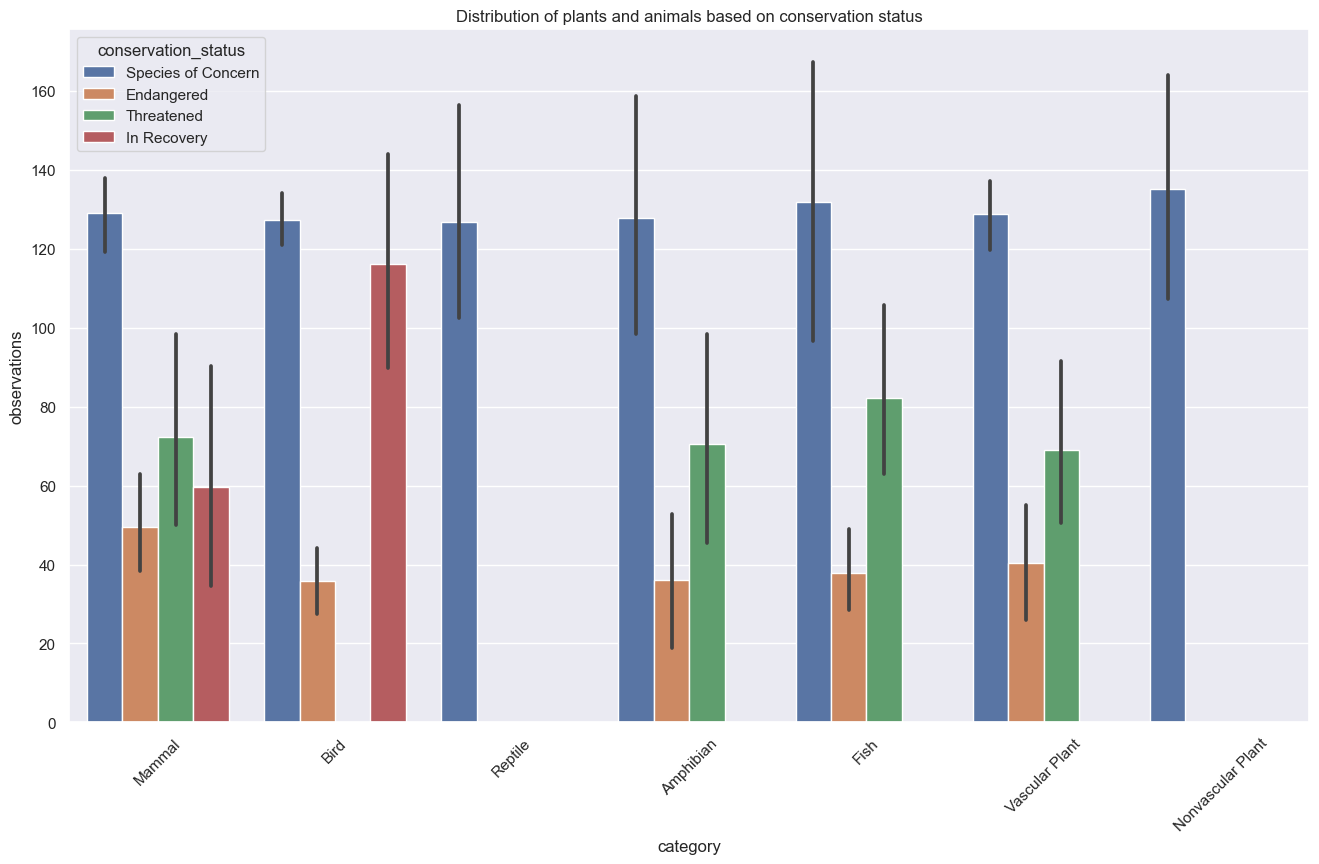

In [134]:
fig = plt.figure(figsize = (16,9))
sns.barplot(
    data = combined,
    x = combined['category'],
    y = combined['observations'],
    hue = combined['conservation_status']
)
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
sns.set(font_scale = 1)
plt.title("Distribution of plants and animals based on conservation status")
plt.show()

The bar plot above shows that `Mammal` had the highest number of endangered species. `Bird`, `Amphibian`,`Fish`, and `Vascular Plant` were also endangered. The following analysis focuses on the <u><b>Endangered</b></u> species and tries to answer some of the questions such as:
- Which national park features the highest number of endangeres species.
- Among the endangered species, which animal was observed the least.

In [135]:
combined.head()

,category,scientific_name,common_names,conservation_status,park_name,observations
0,Mammal,Canis latrans,Coyote,Species of Concern,Bryce National Park,85
1,Mammal,Canis latrans,Coyote,Species of Concern,Yellowstone National Park,206
2,Mammal,Canis latrans,Coyote,Species of Concern,Great Smoky Mountains National Park,68
3,Mammal,Canis latrans,Coyote,Species of Concern,Yosemite National Park,99
4,Mammal,Canis lupus,Gray Wolf,Endangered,Yosemite National Park,35


In [136]:
endangered = combined[combined['conservation_status'] == 'Endangered']

In [137]:
endangered.head()

,category,scientific_name,common_names,conservation_status,park_name,observations
4,Mammal,Canis lupus,Gray Wolf,Endangered,Yosemite National Park,35
5,Mammal,Canis lupus,Gray Wolf,Endangered,Bryce National Park,27
6,Mammal,Canis lupus,Gray Wolf,Endangered,Bryce National Park,29
7,Mammal,Canis lupus,Gray Wolf,Endangered,Bryce National Park,74
8,Mammal,Canis lupus,Gray Wolf,Endangered,Great Smoky Mountains National Park,15


In [138]:
endangered.shape[0]

80

In [184]:
national_parks = endangered.groupby('park_name')['observations'].sum()
print(national_parks)

park_name
Bryce National Park                     619
Great Smoky Mountains National Park     393
Yellowstone National Park              1558
Yosemite National Park                  943
Name: observations, dtype: int64


['Bryce ', 'Great Smoky Mountains ', 'Yellowstone ', 'Yosemite ']


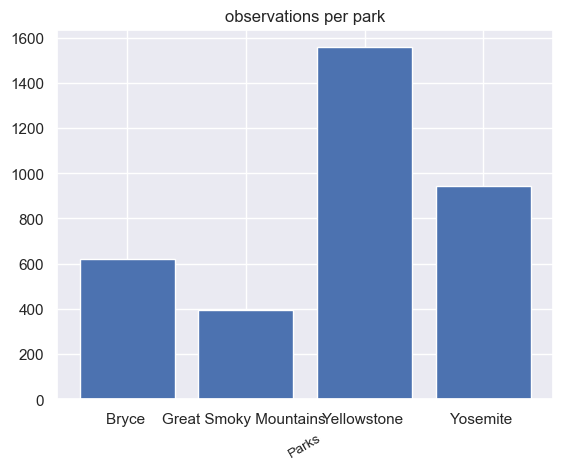

In [183]:
fig, ax = plt.subplots()
#create the data set
values = national_parks.values
parks = national_parks.index
park = parks.tolist()
#strip national park from the name 
park_name = [each.replace("National Park", "") for each in park ]
print(park_name)
#make the bar
ax.bar(park_name, values)
ax.set_title("observations per park for endangered species.")
ax.set_xlabel('Parks', fontsize = 10, rotation = 30)
plt.show()

In [199]:
endangered.sort_values(by = 'observations').head(20)

,category,scientific_name,common_names,conservation_status,park_name,observations
827,Amphibian,Rana sierrae,Sierra Nevada Yellow-Legged Frog,Endangered,Great Smoky Mountains National Park,11
148,Bird,Grus americana,Whooping Crane,Endangered,Great Smoky Mountains National Park,13
18,Mammal,Canis rufus,Red Wolf,Endangered,Great Smoky Mountains National Park,13
12,Mammal,Canis lupus,Gray Wolf,Endangered,Great Smoky Mountains National Park,14
69,Mammal,Myotis sodalis,"Indiana Bat, Indiana Or Social Myotis",Endangered,Great Smoky Mountains National Park,14
724,Mammal,Canis lupus,"Gray Wolf, Wolf",Endangered,Great Smoky Mountains National Park,14
782,Bird,Gymnogyps californianus,California Condor,Endangered,Great Smoky Mountains National Park,15
8,Mammal,Canis lupus,Gray Wolf,Endangered,Great Smoky Mountains National Park,15
257,Bird,Picoides borealis,Red-Cockaded Woodpecker,Endangered,Great Smoky Mountains National Park,15
720,Mammal,Canis lupus,"Gray Wolf, Wolf",Endangered,Great Smoky Mountains National Park,15


The least observed Animal was `Rana sierrae` in `Great Smokey Mountains National Park` with 11 observations. Further if you observe, the animal on top of the endangered status lie in `Great Smokey National Park`. This tells us that this national park is of great importance.

In [197]:
#this one groups the data by the category column and sums the observations column. this should gives us the same
#bar chart as the one above where the number of mammals in observed were higher than other categories.
endangered_category = endangered.groupby('category')['observations'].sum()
print(endangered_category)

category
Amphibian          144
Bird               574
Fish               455
Mammal            2178
Vascular Plant     162
Name: observations, dtype: int64


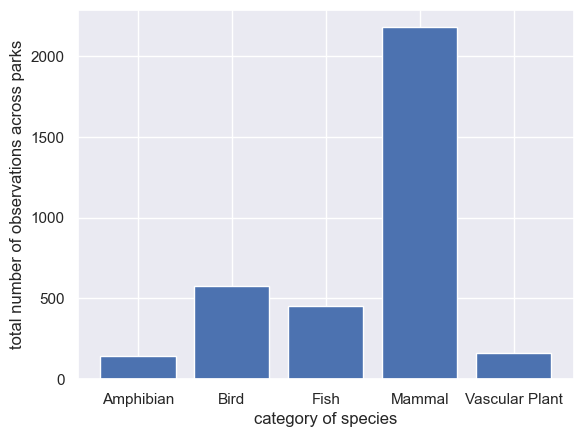

In [198]:
#just plot the data we gathered above. 
plt.bar( endangered_category.index, endangered_category.values)
plt.xlabel("category of species")
plt.ylabel('total number of observations across parks')
plt.show()

## Further analysis. 
Distribution of species across various categories.

In [203]:
conservationCategory = species[species.conservation_status != "No Information"]\
    .groupby(["conservation_status", "category"])['scientific_name']\
    .count()\
    .unstack()

conservationCategory

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1.0,4.0,3.0,7.0,NaN,NaN,1.0
In Recovery,NaN,3.0,NaN,1.0,NaN,NaN,NaN
Species of Concern,4.0,72.0,4.0,28.0,5.0,5.0,43.0
Threatened,2.0,NaN,4.0,2.0,NaN,NaN,2.0


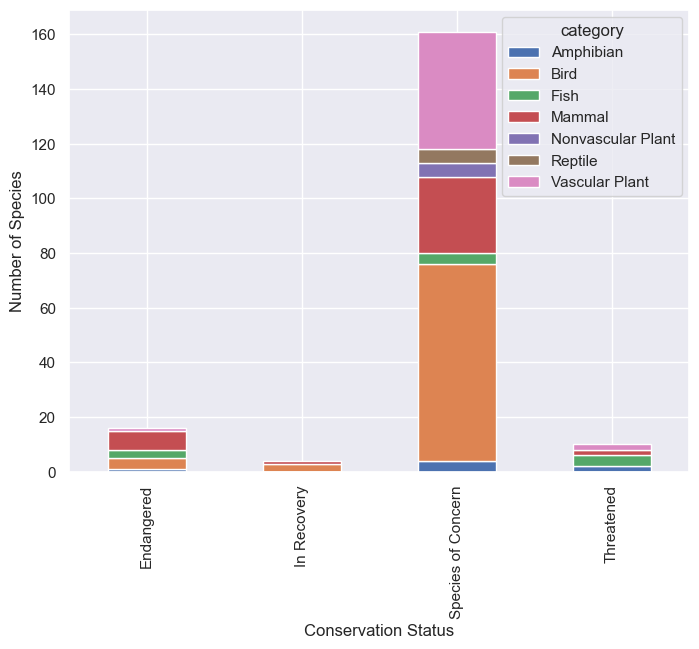

In [205]:
ax = conservationCategory.plot(kind = 'bar', figsize=(8,6), 
                               stacked=True)
ax.set_xlabel("Conservation Status")
ax.set_ylabel("Number of Species");

## Protected and Not Protected Status of animals

In [216]:
species['is_protected'] = species.conservation_status != 'No Information'


,category,scientific_name,common_names,conservation_status,is_protected
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Information,False
1,Mammal,Bos bison,"American Bison, Bison",No Information,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Information,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Information,False
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Information,False
...,...,...,...,...,...
5819,Vascular Plant,Solanum parishii,Parish's Nightshade,No Information,False
5820,Vascular Plant,Solanum xanti,"Chaparral Nightshade, Purple Nightshade",No Information,False
5821,Vascular Plant,Parthenocissus vitacea,"Thicket Creeper, Virginia Creeper, Woodbine",No Information,False
5822,Vascular Plant,Vitis californica,"California Grape, California Wild Grape",No Information,False


In [213]:
category_counts = species.groupby(['category', 'is_protected'])\
                        .scientific_name.nunique()\
                        .reset_index()\
                        .pivot(columns='is_protected',
                                      index='category',
                                      values='scientific_name')\
                        .reset_index()
category_counts.columns = ['category', 'not_protected', 'protected']

category_counts

,category,not_protected,protected
0,Amphibian,72,7
1,Bird,413,75
2,Fish,115,11
3,Mammal,146,30
4,Nonvascular Plant,328,5
5,Reptile,73,5
6,Vascular Plant,4216,46


In [214]:
category_counts['percentage protected'] = 100 * (category_counts.protected / (category_counts.protected + category_counts.not_protected))

In [215]:
category_counts

,category,not_protected,protected,percentage protected
0,Amphibian,72,7,8.860759
1,Bird,413,75,15.368852
2,Fish,115,11,8.730159
3,Mammal,146,30,17.045455
4,Nonvascular Plant,328,5,1.501502
5,Reptile,73,5,6.410256
6,Vascular Plant,4216,46,1.079305


In [ ]:
## our final analysis is to see how the parks are doing. how many of the species observed were protected or not
## protected. for this we need to drop some of the column and merge the data sets

In [225]:
species

,category,scientific_name,common_names,conservation_status,is_protected
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Information,False
1,Mammal,Bos bison,"American Bison, Bison",No Information,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Information,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Information,False
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Information,False
...,...,...,...,...,...
5819,Vascular Plant,Solanum parishii,Parish's Nightshade,No Information,False
5820,Vascular Plant,Solanum xanti,"Chaparral Nightshade, Purple Nightshade",No Information,False
5821,Vascular Plant,Parthenocissus vitacea,"Thicket Creeper, Virginia Creeper, Woodbine",No Information,False
5822,Vascular Plant,Vitis californica,"California Grape, California Wild Grape",No Information,False


In [226]:
final = pd.merge( species, observations, how = "left", on ="scientific_name")

In [232]:
final.drop(['scientific_name','conservation_status'], axis = 1, inplace = True)

In [235]:
final

,category,common_names,is_protected,park_name,observations
0,Mammal,Gapper's Red-Backed Vole,False,Bryce National Park,130
1,Mammal,Gapper's Red-Backed Vole,False,Yellowstone National Park,270
2,Mammal,Gapper's Red-Backed Vole,False,Great Smoky Mountains National Park,98
3,Mammal,Gapper's Red-Backed Vole,False,Yosemite National Park,117
4,Mammal,"American Bison, Bison",False,Yosemite National Park,128
...,...,...,...,...,...
25627,Vascular Plant,"California Grape, California Wild Grape",False,Yellowstone National Park,237
25628,Vascular Plant,"Bullhead, Caltrop, Goathead, Mexican Sandbur, ...",False,Great Smoky Mountains National Park,50
25629,Vascular Plant,"Bullhead, Caltrop, Goathead, Mexican Sandbur, ...",False,Yellowstone National Park,239
25630,Vascular Plant,"Bullhead, Caltrop, Goathead, Mexican Sandbur, ...",False,Bryce National Park,111


In [236]:
final.groupby(['category','park_name','is_protected']).observations.sum()

category           park_name                            is_protected
Amphibian          Bryce National Park                  False              7044
                                                        True                498
                   Great Smoky Mountains National Park  False              5543
                                                        True                333
                   Yellowstone National Park            False             18770
                                                        True               1167
                   Yosemite National Park               False             10959
                                                        True                754
Bird               Bryce National Park                  False             50982
                                                        True               7608
                   Great Smoky Mountains National Park  False             37572
                                                   

In [237]:
final.groupby(['park_name','is_protected']).observations.sum()

park_name                            is_protected
Bryce National Park                  False            614682
                                     True              18609
Great Smoky Mountains National Park  False            462047
                                     True              12816
Yellowstone National Park            False           1543058
                                     True              44583
Yosemite National Park               False            922539
                                     True              26913
Name: observations, dtype: int64

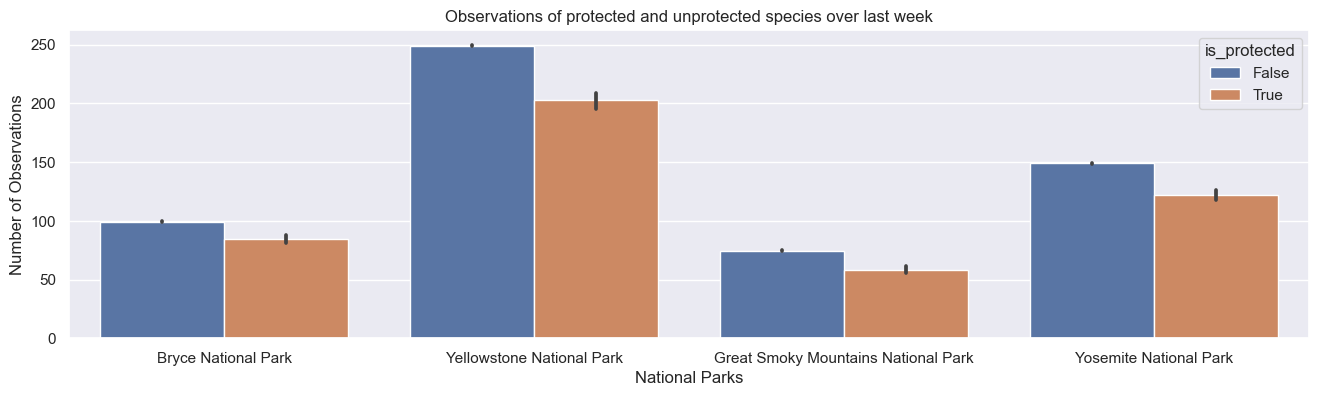

In [240]:
plt.figure(figsize=(16, 4))
sns.barplot(x=final.park_name, y= final.observations, hue=final.is_protected)
plt.xlabel('National Parks')
plt.ylabel('Number of Observations')
plt.title('Observations of protected and unprotected species over last week')
plt.show()

# Conclusion.
Through the analysis of the datasets of observations and species information, we were able to generate necessary insights. We conclude the following findings. 
- `Yellowstone` had the most number of observations per week out of any other national parks.
- The most endangered species with the lowest sightings were in `Great Smokey Mountains National Park`.
- The animal with the least sightings was `Rana Sierrae`.
- `Birds` and `Mammals` had bigger percentage of protected. This means that out of all the species in the dataset, `Birds` and `Mammals` had the bigger number of protected animals. 
- The number of sightings of protected vs not protected animals(which were labelled as <b>Nan</b> in the data set) was varying in different national parks. All of the national park spotted more number of not protected(<b>Nan</b>) animals that the ones in the 4 categories described above. 

## Shortcomings.
Although we gain a lot of insights on the distribution and status of the species, the data set was not enough to confidently predict other information. The varying size of national parks have a major role in the number of sightings. We cannot infer if one is doing better than other. Similarly, the dataset was in itself small. Only `191` species were `Endangered`, `Species of Concern`,`Threatened`,or `In Recovery`. The rest needed `No intervention`. The available data set of the species that require attention is very small to the overall dataset.  

In [83]:
#we can see that there is a lot of repetition in the data. lets combine the rows that have the same park_name,
#conservation status, and common names.

grouped_df = drop_df.groupby(['common_names','conservation_status','park_name'])['observations'].sum().reset_index()

In [241]:
##this final dataset contains the names of the species, observations over the past 7 days and their conservation_status
## from this, we want to infer things such as which animal was spotted the least and the most.
##does this co-relate with its conservation_status.
##we also want which animal that was most spotted and least spotted and which category it fell into. is there a 
##relation there as well, in terms of category and their status. 
grouped_df.head()


,common_names,conservation_status,park_name,observations
0,"American Badger, Badger",Species of Concern,Bryce National Park,159
1,"American Badger, Badger",Species of Concern,Great Smoky Mountains National Park,137
2,"American Badger, Badger",Species of Concern,Yellowstone National Park,449
3,"American Badger, Badger",Species of Concern,Yosemite National Park,255
4,American Bittern,Species of Concern,Bryce National Park,74


In [248]:
grouped_df.groupby(['common_names','conservation_status']).observations.sum().shape

(191,)

In [254]:
grouped_df.common_names.unique().size

190